In [84]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Read Data

In [2]:
df=pd.read_csv("q2data/dataset.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,35,45,45,48,50,52,54,60,61,65,...,7,6,7,6,6,8,8,9,9,9
1,13,12,11,13,11,12,11,12,16,22,...,47,68,74,64,71,72,72,67,62,58
2,12,15,20,24,27,30,42,48,49,57,...,6,6,12,17,15,10,9,9,8,7
3,9,8,7,7,8,9,15,19,29,34,...,123,54,10,10,10,7,6,7,7,18
4,114,112,112,112,112,108,116,118,118,115,...,65,62,59,53,49,44,37,36,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,27,27,27,30,29,30,30,28,30,37,...,8,5,6,5,6,6,6,6,6,6
1696,25,26,26,29,30,29,30,32,35,43,...,11,6,6,6,6,6,6,6,6,7
1697,9,8,6,7,6,8,8,10,10,13,...,170,19,24,27,25,23,15,14,23,30
1698,9,7,6,6,8,8,9,11,14,20,...,235,145,39,34,29,24,13,25,21,26


### Normalize data

In [46]:
normalized_df=pd.DataFrame(columns=df.columns)

In [47]:
for i in range(0, len(df)):
    magnitude = 0
    for j in range(len(df.iloc[i])):
        magnitude = magnitude + (df.loc[i][j])**2
        
    magnitude = magnitude**0.5

    lis=[]
    for j in range(len(df.iloc[i])):
        val=df.loc[i][j]
        lis.append(val/magnitude)

    normalized_df.loc[i]=lis

In [91]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.020629,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.004133,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.093614,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.026377,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.028712,0.028712,0.028712,0.031902,0.030838,0.031902,0.031902,0.029775,0.031902,0.039345,...,0.017014,0.008507,0.005317,0.006380,0.005317,0.006380,0.006380,0.006380,0.006380,0.006380
1696,0.027285,0.028376,0.028376,0.031650,0.032741,0.031650,0.032741,0.034924,0.038198,0.046929,...,0.019645,0.012005,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548
1697,0.007730,0.006871,0.005153,0.006012,0.005153,0.006871,0.006871,0.008589,0.008589,0.011165,...,0.145148,0.146006,0.016318,0.020613,0.023189,0.021472,0.019754,0.012883,0.012024,0.019754
1698,0.008116,0.006312,0.005410,0.005410,0.007214,0.007214,0.008116,0.009919,0.012624,0.018035,...,0.186657,0.211906,0.130750,0.035167,0.030659,0.026150,0.021641,0.011722,0.022543,0.018936


In [50]:
normalized_df.to_csv("q2data/normalized_dataset.csv")

In [3]:
# normalized_df=pd.read_csv("q2data/normalized_dataset.csv",usecols=range(1, len(df.columns)))

### For each of the 10 subjects, randomly select 150 images for training and use the remaining 20 for testing.

In [4]:
lis=[]
for i in range(1700):
    lis.append(i//170)

In [5]:
normalized_df["label"]=lis

In [6]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,label
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.028712,0.028712,0.028712,0.031902,0.030838,0.031902,0.031902,0.029775,0.031902,0.039345,...,0.008507,0.005317,0.006380,0.005317,0.006380,0.006380,0.006380,0.006380,0.006380,9
1696,0.027285,0.028376,0.028376,0.031650,0.032741,0.031650,0.032741,0.034924,0.038198,0.046929,...,0.012005,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,9
1697,0.007730,0.006871,0.005153,0.006012,0.005153,0.006871,0.006871,0.008589,0.008589,0.011165,...,0.146006,0.016318,0.020613,0.023189,0.021472,0.019754,0.012883,0.012024,0.019754,9
1698,0.008116,0.006312,0.005410,0.005410,0.007214,0.007214,0.008116,0.009919,0.012624,0.018035,...,0.211906,0.130750,0.035167,0.030659,0.026150,0.021641,0.011722,0.022543,0.018936,9


### Splitting data into training and testing data

In [7]:
testing=normalized_df.copy()
training=pd.DataFrame(columns=normalized_df.columns)
temp=normalized_df.groupby("label")
for block in temp.groups:
    rows=temp.get_group(block).sample(n=150)
    training=training.append(rows)
    testing.drop(rows.index,inplace=True)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_12944\1600355252.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_12944\1600355252.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_12944\1600355252.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_12944\1600355252.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_12944\1600355252.py:6: F

In [109]:
training

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,label
80,0.004970,0.006213,0.006213,0.005591,0.005591,0.006834,0.006213,0.006213,0.006213,0.006213,...,0.039140,0.037277,0.032928,0.031685,0.033549,0.036034,0.033549,0.029821,0.018638,0
17,0.005393,0.006067,0.006067,0.007415,0.007415,0.006741,0.006741,0.006741,0.006741,0.007415,...,0.004045,0.003371,0.003371,0.002696,0.003371,0.003371,0.003371,0.003371,0.004045,0
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0
22,0.023179,0.027423,0.025791,0.027423,0.024812,0.027750,0.028076,0.031341,0.032647,0.033300,...,0.001959,0.001632,0.001632,0.001632,0.001632,0.001632,0.001632,0.001632,0.001632,0
20,0.008898,0.009639,0.008898,0.008156,0.008156,0.009268,0.010381,0.012976,0.015571,0.014829,...,0.003337,0.002224,0.002224,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,0.008612,0.011262,0.012587,0.015900,0.017225,0.020537,0.021862,0.025837,0.025175,0.024512,...,0.005300,0.004637,0.005300,0.005962,0.007287,0.006625,0.005300,0.005962,0.004637,9
1570,0.006905,0.006905,0.006411,0.005918,0.005918,0.005425,0.006411,0.006411,0.007398,0.008384,...,0.007891,0.007891,0.008384,0.008384,0.009371,0.011343,0.019234,0.030578,0.025646,9
1619,0.016306,0.010376,0.009635,0.011117,0.013341,0.013341,0.016306,0.019270,0.022976,0.023717,...,0.069669,0.065963,0.040023,0.015564,0.005929,0.005929,0.005929,0.005929,0.007412,9
1614,0.007154,0.005470,0.004208,0.005891,0.007154,0.007154,0.009678,0.010520,0.013045,0.013045,...,0.016411,0.015990,0.012624,0.011362,0.015990,0.014307,0.020619,0.016832,0.018936,9


In [110]:
testing

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,label
12,0.029744,0.031566,0.033994,0.032780,0.033994,0.035208,0.037029,0.036422,0.035815,0.036422,...,0.005463,0.007284,0.007284,0.010319,0.032780,0.013962,0.012141,0.012748,0.012141,0
45,0.002996,0.003895,0.007491,0.012885,0.015582,0.015282,0.015282,0.016780,0.018279,0.020376,...,0.012286,0.011387,0.010787,0.008690,0.007791,0.007791,0.008090,0.010488,0.012286,0
57,0.004754,0.005313,0.005313,0.005873,0.005873,0.005873,0.005873,0.005873,0.006152,0.006152,...,0.002796,0.003076,0.002796,0.002517,0.003356,0.004474,0.003915,0.007271,0.015940,0
59,0.005297,0.005885,0.005885,0.005885,0.005885,0.006474,0.006474,0.006474,0.007062,0.007062,...,0.003531,0.003531,0.003531,0.003531,0.003531,0.004120,0.004708,0.005885,0.008828,0
65,0.004925,0.005304,0.005683,0.004925,0.006062,0.006062,0.006062,0.006441,0.006820,0.006441,...,0.002652,0.002652,0.002652,0.002273,0.003410,0.003410,0.002652,0.004168,0.006820,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,0.017000,0.017472,0.018417,0.018889,0.018889,0.018417,0.017945,0.020306,0.024083,0.027389,...,0.012278,0.010389,0.005667,0.003306,0.003306,0.003778,0.003306,0.003306,0.003306,9
1659,0.022821,0.021829,0.022490,0.022490,0.022490,0.023482,0.025797,0.030097,0.035719,0.039358,...,0.008599,0.007276,0.004300,0.002646,0.002646,0.002646,0.002646,0.002646,0.002646,9
1669,0.030696,0.029559,0.031454,0.031454,0.032591,0.032591,0.033349,0.037138,0.043581,0.048128,...,0.009095,0.007579,0.004548,0.002274,0.002653,0.003032,0.003032,0.003032,0.003032,9
1673,0.011633,0.010290,0.012080,0.015659,0.017449,0.018344,0.021028,0.022370,0.022370,0.022818,...,0.097982,0.113194,0.113194,0.090824,0.062190,0.041161,0.043399,0.034898,0.036687,9


### Implement a k Nearest Neighbors (k-NN) classifier from scratch

## KNN ALGORITHM

In [164]:
def KNN(training,testing,k,distanceMeasure):
    total=0
    correct=0
    for index,row in testing.iterrows():
        distance=[]
        testing_row=[row[column] for column in testing.columns[:-1]]
        for index_2,row_2 in training.iterrows():
            training_row=[row_2[column] for column in training.columns[:-1]]
            if distanceMeasure=="Euclidean":
                distance.append(np.linalg.norm(np.array(testing_row)-np.array(training_row),ord=2))
            if distanceMeasure=="cosineSimilarity":
                dotProduct=np.dot(np.array(testing_row),np.array(training_row))
                norm_test=np.linalg.norm(np.array(testing_row))
                norm_train=np.linalg.norm(np.array(training_row))
                cosineSimilarity=dotProduct/(norm_test*norm_train)
                distance.append(cosineSimilarity)
        lowest_distances=[]
        if distanceMeasure=="Euclidean":
            for i in range(0,k):
                lowest_distances.append(distance.index(min(distance)))
                del distance[distance.index(min(distance))]
        if distanceMeasure=="cosineSimilarity":
            for i in range(0,k):
                lowest_distances.append(distance.index(max(distance)))
                del distance[distance.index(max(distance))]
        label=[]
        for j in range(0,len(lowest_distances)):
            label.append(training.iloc[lowest_distances[j]][1023])
        if max(label,key=label.count) == row["label"]:
            correct=correct+1
        total=total+1

    print("Accuracy: ",correct/total*100)

# Testing for Euclidean

## K=2

In [167]:
KNN(training,testing,2,"Euclidean")

Accuracy:  99.0


## K=5

In [168]:
KNN(training,testing,5,"Euclidean")

Accuracy:  98.0


## K=7

In [169]:
KNN(training,testing,7,"Euclidean")

Accuracy:  96.0


## K=11

In [170]:
KNN(training,testing,11,"Euclidean")

Accuracy:  96.0


# Testing for Cosine Similarity

## K=2

In [171]:
KNN(training,testing,2,"cosineSimilarity")

Accuracy:  99.0


## K=5

In [172]:
KNN(training,testing,5,"cosineSimilarity")

Accuracy:  98.0


## K=7

In [173]:
KNN(training,testing,7,"cosineSimilarity")

Accuracy:  96.0


## K=11

In [174]:
KNN(training,testing,11,"cosineSimilarity")

Accuracy:  96.0


## You should also present results when fewer training images are used (for instead 100 training images and 70 test images per subject)

In [202]:
testing_new=normalized_df.copy()
training_new=pd.DataFrame(columns=normalized_df.columns)
temp=normalized_df.groupby("label")
for block in temp.groups:
    rows=temp.get_group(block).sample(n=100)
    training_new=training_new.append(rows)
    testing_new.drop(rows.index,inplace=True)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_6700\92035136.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_new=training_new.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_6700\92035136.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_new=training_new.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_6700\92035136.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_new=training_new.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_6700\92035136.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_new=training_new.append(rows)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_6700

In [206]:
for i in ["Euclidean","cosineSimilarity"]:
    for j in [2,5,7,11]:
        print("for ",i," and k=",j," :")
        KNN(training_new,testing_new,j,i)
        print("")

for  Euclidean  and k= 2  :
Accuracy:  97.85714285714285

for  Euclidean  and k= 5  :
Accuracy:  94.57142857142857

for  Euclidean  and k= 7  :
Accuracy:  93.85714285714286

for  Euclidean  and k= 11  :
Accuracy:  90.14285714285715

for  cosineSimilarity  and k= 2  :
Accuracy:  97.85714285714285

for  cosineSimilarity  and k= 5  :
Accuracy:  94.57142857142857

for  cosineSimilarity  and k= 7  :
Accuracy:  94.0

for  cosineSimilarity  and k= 11  :
Accuracy:  90.28571428571428



## Use Sklearn to apply SVM and GaussianNB on this dataset and compare the accuracy with K-NN

In [55]:
X_train=training[training.columns[:-1]]
Y_train=training[training.columns[-1]]
x_test=testing[testing.columns[:-1]]
y_test=testing[testing.columns[-1]]

In [67]:
np.array(Y_train,dtype=int)

array([0, 0, 0, ..., 9, 9, 9])

### SVM

In [68]:
clf = SVC(kernel='linear')
clf.fit(X_train,np.array(Y_train,dtype=int))
y_pred = clf.predict(x_test)
accuracy = accuracy_score(np.array(y_test,dtype=int),y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97


## GaussianNB

In [70]:
clf = GaussianNB()
clf.fit(X_train,np.array(Y_train,dtype=int))
y_pred = clf.predict(x_test)
accuracy = accuracy_score(np.array(y_test,dtype=int),y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.82


## Perform dimensionality reduction on the training and testing datasets and visualize them in 3-D space using the Principal Component Analysis (PCA) and matplotlib or Seaborn

### Traning dataset

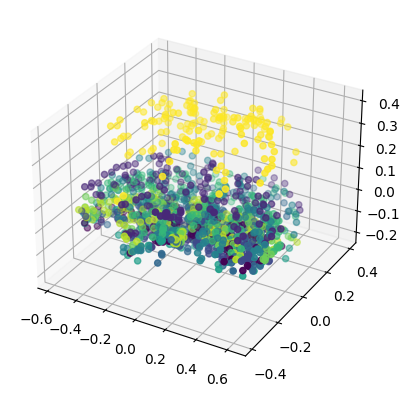

In [95]:
df_prediction=training[training.columns[-1]]
df_features=training[training.columns[:-1]]
std_oh_enc_arr=df_features
n_component=PCA(n_components=3)
n_component_std_oh_enc_arr=n_component.fit_transform(std_oh_enc_arr)
n_component_std_oh_enc_arr
pca_df=pd.DataFrame(n_component_std_oh_enc_arr,columns=['c1','c2','c3'])
new_df=pd.concat([pca_df.reset_index(drop=True),df_prediction.reset_index(drop=True)],axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df[new_df.columns[0]],new_df[new_df.columns[1]],new_df[new_df.columns[2]],c=new_df[new_df.columns[3]])

### Testing dataset

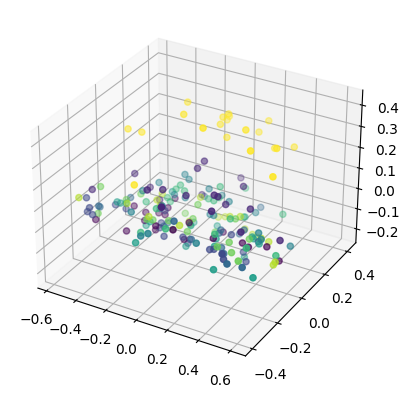

In [96]:
df_prediction=testing[testing.columns[-1]]
df_features=testing[testing.columns[:-1]]
std_oh_enc_arr=df_features
n_component=PCA(n_components=3)
n_component_std_oh_enc_arr=n_component.fit_transform(std_oh_enc_arr)
n_component_std_oh_enc_arr
pca_df=pd.DataFrame(n_component_std_oh_enc_arr,columns=['c1','c2','c3'])
new_df=pd.concat([pca_df.reset_index(drop=True),df_prediction.reset_index(drop=True)],axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df[new_df.columns[0]],new_df[new_df.columns[1]],new_df[new_df.columns[2]],c=new_df[new_df.columns[3]])